<a href="https://colab.research.google.com/github/VardhanVelamakanni/CNN_RNN_ANN/blob/main/braintumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
import zipfile
import os

# Upload the ZIP file
uploaded = files.upload()

# Get the uploaded zip filename (usually the only file in uploaded)
zip_filename = list(uploaded.keys())[0]

# Create a directory for your dataset
os.makedirs('/content/dataset', exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# List all files in the dataset folder
for root, dirs, files in os.walk('/content/dataset'):
    for file in files:
        print(os.path.join(root, file))

# Remove the original ZIP file (optional)
os.remove(zip_filename)

Saving Dataset.zip to Dataset.zip
/content/dataset/Dataset/Training/no_tumor/image(314).jpg
/content/dataset/Dataset/Training/no_tumor/image(133).jpg
/content/dataset/Dataset/Training/no_tumor/image(269).jpg
/content/dataset/Dataset/Training/no_tumor/image(51).jpg
/content/dataset/Dataset/Training/no_tumor/image(81).jpg
/content/dataset/Dataset/Training/no_tumor/image(28).jpg
/content/dataset/Dataset/Training/no_tumor/image(213).jpg
/content/dataset/Dataset/Training/no_tumor/image (61).jpg
/content/dataset/Dataset/Training/no_tumor/image (17).jpg
/content/dataset/Dataset/Training/no_tumor/image(287).jpg
/content/dataset/Dataset/Training/no_tumor/image(42).jpg
/content/dataset/Dataset/Training/no_tumor/image(128).jpg
/content/dataset/Dataset/Training/no_tumor/image(88).jpg
/content/dataset/Dataset/Training/no_tumor/image (22).jpg
/content/dataset/Dataset/Training/no_tumor/image(186).jpg
/content/dataset/Dataset/Training/no_tumor/image(121).jpg
/content/dataset/Dataset/Training/no_tumor/

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [4]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [6]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/dataset/Dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/dataset/Dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 474s 6s/step - accuracy: 0.2707 - loss: 4.5145 - val_accuracy: 0.2789 - val_loss: 1.3657
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 514s 6s/step - accuracy: 0.3064 - loss: 1.3575 - val_accuracy: 0.4456 - val_loss: 1.2509
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 487s 6s/step - accuracy: 0.4644 - loss: 1.2024 - val_accuracy: 0.6259 - val_loss: 0.8999
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.5673 - loss: 1.0036 - val_accuracy: 0.6088 - val_loss: 0.8539
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 506s 6s/step - accuracy: 0.6029 - loss: 0.8608 - val_accuracy: 0.7211 - val_loss: 0.6894
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 503s 6s/step - accuracy: 0.6677 - loss: 0.7527 - val_accuracy: 0.7143 - val_loss: 0.6631
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 470s 6s/step - accuracy: 0.7190 - loss: 0.6635 - val_accuracy: 0.6633 - val_loss: 0.7927
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 494s 6s/step - accuracy: 0.7484 - loss: 0.5981 - val_accuracy: 0.7551 - v

In [28]:
cnn_acc = history.history['accuracy'][-1]
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

CNN Test Accuracy: 0.9463


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model_ann = Sequential()
model_ann.add(Flatten(input_shape=(150,150,3)))  # flatten image to 1D vector
model_ann.add(Dense(512, activation='relu'))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(256, activation='relu'))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(128, activation='relu'))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(4, activation='softmax'))  # 4 classes

model_ann.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    34,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,725,252 (132.47 MB)

 Trainable params: 34,725,252 (132.47 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.optimizers import Adam

# Compile ANN
model_ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train ANN
history_ann = model_ann.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluate ANN
loss_ann, acc_ann = model_ann.evaluate(X_test, y_test)
print(f"ANN Test Accuracy: {acc_ann:.4f}")


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 63s 657ms/step - accuracy: 0.3022 - loss: 1053.0360 - val_accuracy: 0.2905 - val_loss: 1.8993
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 87s 715ms/step - accuracy: 0.2963 - loss: 2.6349 - val_accuracy: 0.2875 - val_loss: 1.3640
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 642ms/step - accuracy: 0.2865 - loss: 1.4880 - val_accuracy: 0.2875 - val_loss: 1.3579
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 642ms/step - accuracy: 0.2868 - loss: 1.3794 - val_accuracy: 0.2905 - val_loss: 1.3618
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 55s 601ms/step - accuracy: 0.2916 - loss: 1.3580 - val_accuracy: 0.2905 - val_loss: 1.3615
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 57s 615ms/step - accuracy: 0.2953 - loss: 1.3575 - val_accuracy: 0.2905 - val_loss: 1.3616
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 617ms/step - accuracy: 0.2693 - loss: 1.3591 - val_accuracy: 0.2905 - val_loss: 1.3617
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 611ms/step - accuracy: 0.2975 - loss: 1.3670 - val_a

In [16]:
X_train = X_train.reshape(-1, 150, 150*3)
X_test = X_test.reshape(-1, 150, 150*3)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_rnn = Sequential()
# reshape input: 150 rows as time steps, each row has 150*3 features
model_rnn.add(LSTM(128, return_sequences=True, input_shape=(150, 150*3)))
model_rnn.add(Dropout(0.3))
model_rnn.add(LSTM(128))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(256, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(4, activation='softmax'))

model_rnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150, 128)       │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 150, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,084 (1.76 MB)

 Trainable params: 462,084 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:


# Compile RNN
model_rnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train RNN
history_rnn = model_rnn.fit(
    X_train_rnn, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_rnn, y_test)
)

# Evaluate RNN
loss_rnn, acc_rnn = model_rnn.evaluate(X_test_rnn, y_test)
print(f"RNN Test Accuracy: {acc_rnn:.4f}")


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 53s 539ms/step - accuracy: 0.3991 - loss: 1.2352 - val_accuracy: 0.5719 - val_loss: 0.9914
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 531ms/step - accuracy: 0.5232 - loss: 1.0834 - val_accuracy: 0.5872 - val_loss: 0.9578
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 85s 565ms/step - accuracy: 0.6077 - loss: 0.9136 - val_accuracy: 0.5902 - val_loss: 0.9082
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 531ms/step - accuracy: 0.6091 - loss: 0.9061 - val_accuracy: 0.6422 - val_loss: 0.8046
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 521ms/step - accuracy: 0.6345 - loss: 0.8282 - val_accuracy: 0.6453 - val_loss: 0.8808
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 88s 580ms/step - accuracy: 0.6763 - loss: 0.7822 - val_accuracy: 0.6881 - val_loss: 0.7451
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 571ms/step - accuracy: 0.6912 - loss: 0.7299 - val_accuracy: 0.7156 - val_loss: 0.7239
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 55s 600ms/step - accuracy: 0.7348 - loss: 0.6836 - val_accu

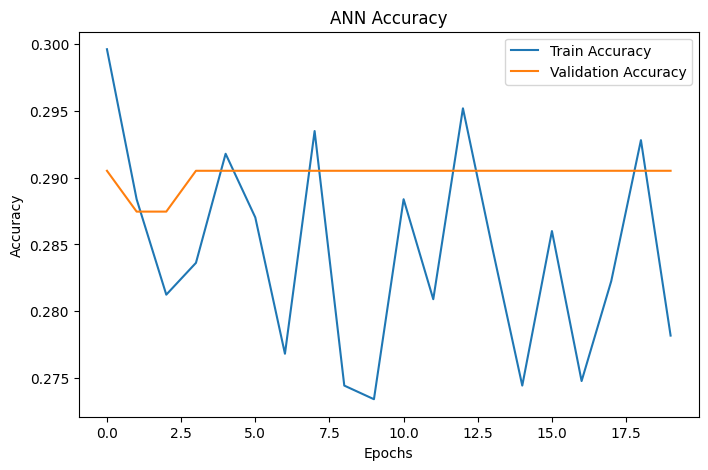

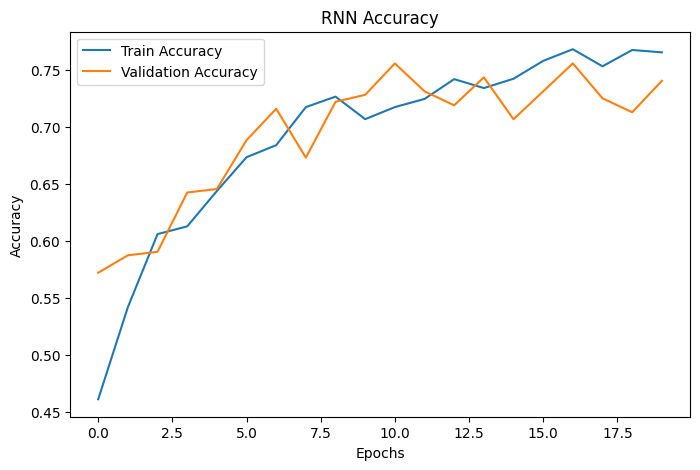

In [21]:
import matplotlib.pyplot as plt

# ----------- ANN Accuracy Plot -----------
plt.figure(figsize=(8,5))
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ----------- RNN Accuracy Plot -----------
plt.figure(figsize=(8,5))
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("RNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


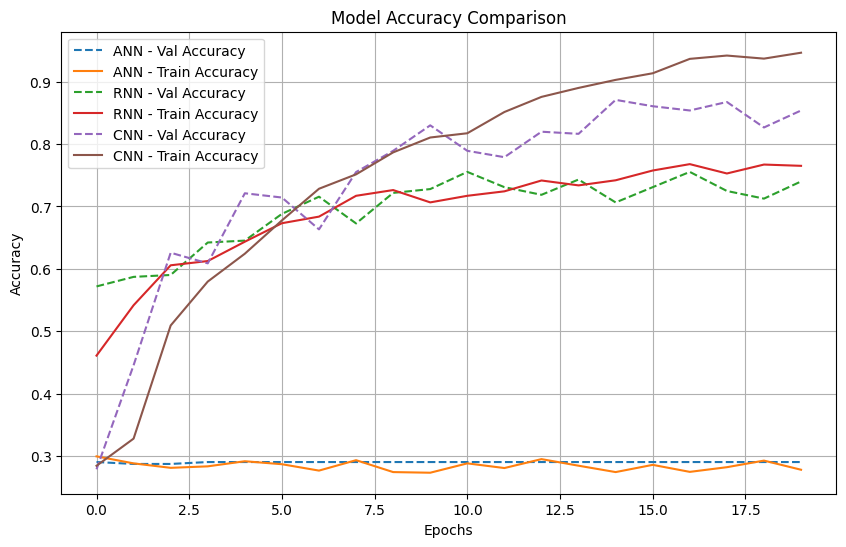

In [23]:
import matplotlib.pyplot as plt

# ---------- Accuracy Comparison ----------
plt.figure(figsize=(10,6))

# ANN
plt.plot(history_ann.history['val_accuracy'], label='ANN - Val Accuracy', linestyle='--')
plt.plot(history_ann.history['accuracy'], label='ANN - Train Accuracy')

# RNN
plt.plot(history_rnn.history['val_accuracy'], label='RNN - Val Accuracy', linestyle='--')
plt.plot(history_rnn.history['accuracy'], label='RNN - Train Accuracy')

# CNN
plt.plot(history.history['val_accuracy'], label='CNN - Val Accuracy', linestyle='--')
plt.plot(history.history['accuracy'], label='CNN - Train Accuracy')

plt.title("Model Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


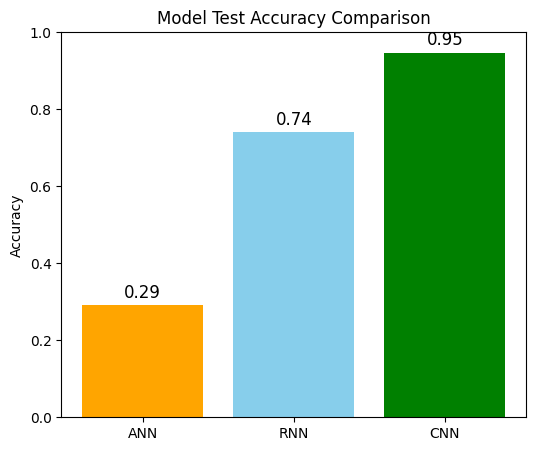

In [30]:
import matplotlib.pyplot as plt

# Accuracies (replace with your evaluated values)
accuracies = {
    "ANN": acc_ann,
    "RNN": acc_rnn,
    "CNN": cnn_acc
}

# Bar Plot
plt.figure(figsize=(6,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['orange','skyblue','green'])
plt.title("Model Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)  # accuracy is between 0 and 1
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()


In [32]:
def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Classification Report (Precision, Recall, F1-score, Accuracy)
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, digits=4))

    # ROC-AUC (for multi-class, average='macro')
    try:
        roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class="ovr")
        print(f"{model_name} ROC-AUC Score: {roc_auc:.4f}")
    except:
        print(f"{model_name} ROC-AUC could not be calculated (check labels).")


11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


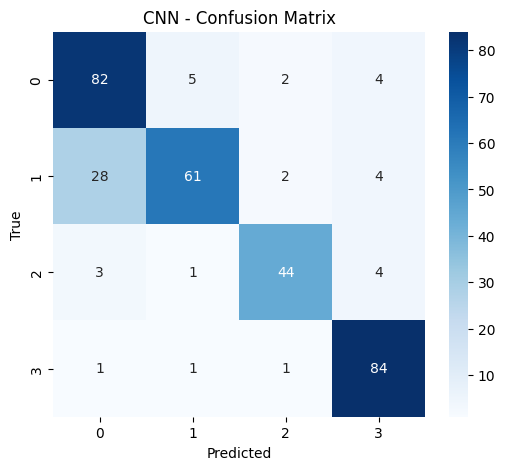


Classification Report for CNN:

              precision    recall  f1-score   support

           0     0.7193    0.8817    0.7923        93
           1     0.8971    0.6421    0.7485        95
           2     0.8980    0.8462    0.8713        52
           3     0.8750    0.9655    0.9180        87

    accuracy                         0.8287       327
   macro avg     0.8473    0.8339    0.8325       327
weighted avg     0.8408    0.8287    0.8256       327

CNN ROC-AUC Score: 0.9625
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


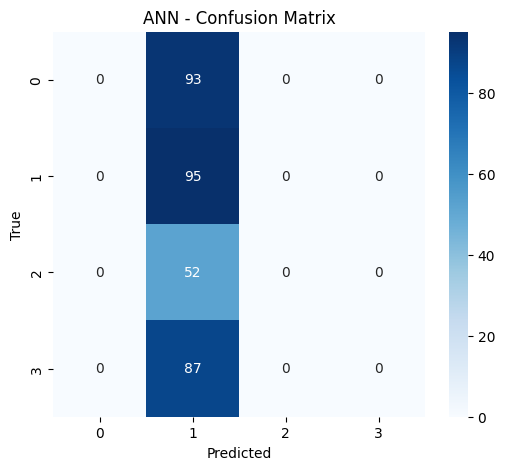


Classification Report for ANN:

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        93
           1     0.2905    1.0000    0.4502        95
           2     0.0000    0.0000    0.0000        52
           3     0.0000    0.0000    0.0000        87

    accuracy                         0.2905       327
   macro avg     0.0726    0.2500    0.1126       327
weighted avg     0.0844    0.2905    0.1308       327

ANN ROC-AUC Score: 0.5000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step


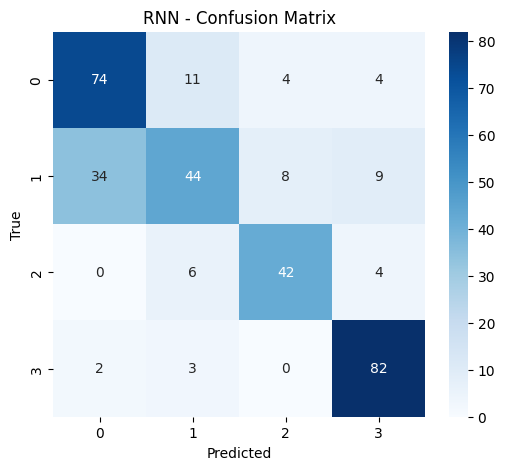


Classification Report for RNN:

              precision    recall  f1-score   support

           0     0.6727    0.7957    0.7291        93
           1     0.6875    0.4632    0.5535        95
           2     0.7778    0.8077    0.7925        52
           3     0.8283    0.9425    0.8817        87

    accuracy                         0.7401       327
   macro avg     0.7416    0.7523    0.7392       327
weighted avg     0.7351    0.7401    0.7287       327

RNN ROC-AUC Score: 0.9342


In [38]:
# Reshape X_test for CNN and ANN models if needed
# Assuming the original X_test shape before RNN reshape was (n_samples, 150, 150, 3)
# If you ran the RNN reshape, we need to use the original X_test before that reshape.
# A safer approach is to reshape X_test specifically for each model call.

# Create copies and reshape for each model
X_test_cnn_ann = X_test.reshape(-1, 150, 150, 3) # Assuming this was the original shape

# CNN Metrics
evaluate_model(model, X_test_cnn_ann, y_test, "CNN")

# ANN Metrics
evaluate_model(model_ann, X_test_cnn_ann, y_test, "ANN")

# RNN Metrics (using the already reshaped X_test for RNN from cell NSem81uScpPP)
# Assuming the RNN reshape was done in cell NSem81uScpPP and stored in X_test
# If you used different variables for RNN, use those here.
X_test_rnn = X_test # X_test was already reshaped for RNN in cell NSem81uScpPP

evaluate_model(model_rnn, X_test_rnn, y_test, "RNN")

11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step
  Model  Accuracy  Precision    Recall
0   CNN  0.828746   0.840777  0.828746
1   ANN  0.290520   0.084402  0.290520
2   RNN  0.740061   0.735111  0.740061


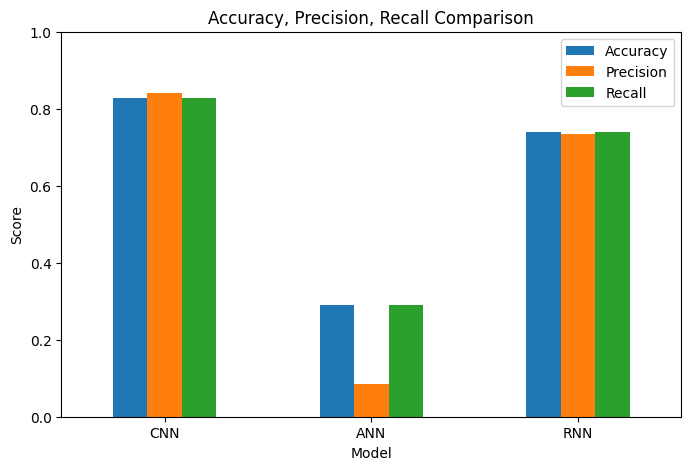

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Assuming the original X_test shape before RNN reshape was (n_samples, 150, 150, 3)
X_test_original_shape = X_test.reshape(-1, 150, 150, 3)
y_true = np.argmax(y_test, axis=1) # Calculate y_true from y_test


# ---- CNN ----
y_pred_probs_cnn = model.predict(X_test_original_shape)
y_pred_cnn = np.argmax(y_pred_probs_cnn, axis=1)

acc_cnn = accuracy_score(y_true, y_pred_cnn)
prec_cnn = precision_score(y_true, y_pred_cnn, average='weighted')
rec_cnn = recall_score(y_true, y_pred_cnn, average='weighted')

# ---- ANN ----
y_pred_probs_ann = model_ann.predict(X_test_original_shape)
y_pred_ann = np.argmax(y_pred_probs_ann, axis=1)

acc_ann = accuracy_score(y_true, y_pred_ann)
prec_ann = precision_score(y_true, y_pred_ann, average='weighted')
rec_ann = recall_score(y_true, y_pred_ann, average='weighted')

# ---- RNN ----
# X_test is already in the correct shape for RNN from cell NSem81uScpPP
y_pred_probs_rnn = model_rnn.predict(X_test)
y_pred_rnn = np.argmax(y_pred_probs_rnn, axis=1)

acc_rnn = accuracy_score(y_true, y_pred_rnn)
prec_rnn = precision_score(y_true, y_pred_rnn, average='weighted')
rec_rnn = recall_score(y_true, y_pred_rnn, average='weighted')

# ---- Combine Results ----
results = pd.DataFrame({
    "Model": ["CNN", "ANN", "RNN"],
    "Accuracy": [acc_cnn, acc_ann, acc_rnn],
    "Precision": [prec_cnn, prec_ann, prec_rnn],
    "Recall": [rec_cnn, rec_ann, rec_rnn]
})

print(results)

# ---- Optional: Bar Plot for Comparison ----
results.set_index("Model").plot(kind="bar", figsize=(8,5), rot=0)
plt.title("Accuracy, Precision, Recall Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

In [ ]:
img = cv2.imread('../content/dataset/Testing/meningioma_tumor/image(1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

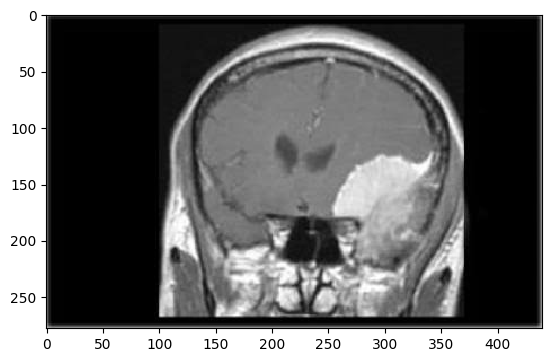

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../content/dataset/Testing/meningioma_tumor/image(1).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


np.int64(1)

In [ ]:
class_names = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
a=model.predict(img_array)
index = a.argmax()
tumor_name = class_names[index]
print(f"Predicted tumor: {tumor_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted tumor: Meningioma


In [ ]:
from sklearn.metrics import f1_score
# After prediction
y_pred = model.predict(X_test).argmax(axis=1)  # Predicted classes
y_true = y_test.argmax(axis=1)  # True classes (assuming one-hot encoded)
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' for multi-class
print(f"F1 Score: {f1:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step
F1 Score: 0.8255


11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


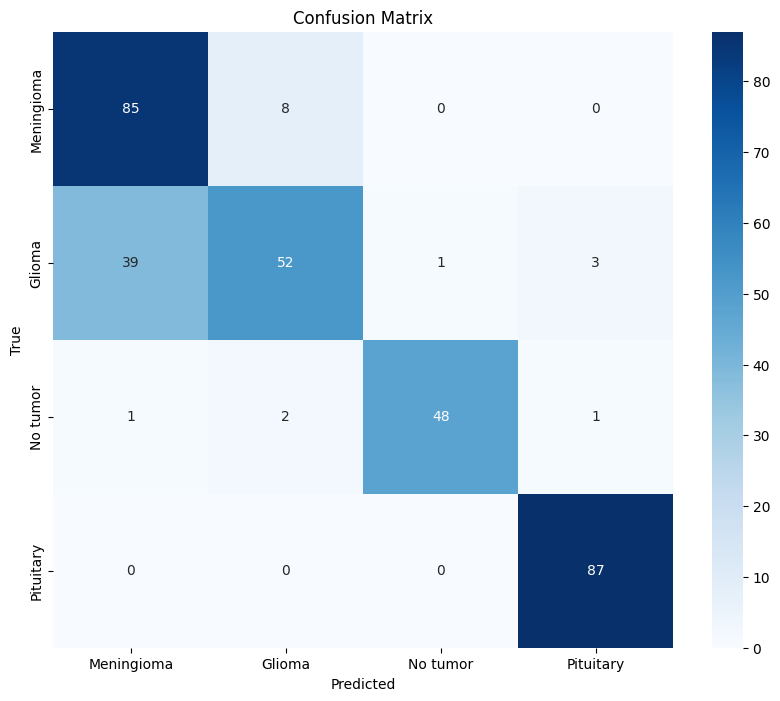

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_proba = model.predict(X_test)
y_true = y_test  # One-hot encoded
mae = mean_absolute_error(y_true, y_pred_proba)
print(f"Mean Absolute Error: {mae:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Mean Absolute Error: 0.0898


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
print(classification_report(y_true, y_pred, target_names=class_names))

11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step
              precision    recall  f1-score   support

  Meningioma       0.68      0.91      0.78        93
      Glioma       0.84      0.55      0.66        95
    No tumor       0.98      0.92      0.95        52
   Pituitary       0.96      1.00      0.98        87

    accuracy                           0.83       327
   macro avg       0.86      0.85      0.84       327
weighted avg       0.85      0.83      0.83       327



In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

y_pred_proba = model.predict(X_test)  # Probability scores
y_true = y_test  # One-hot encoded true labels
auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')  # 'ovr' = one-vs-rest
print(f"AUC-ROC Score: {auc:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
AUC-ROC Score: 0.9652


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)
tn = cm[0,0]  # True negatives (assuming class 0 is negative)
fp = cm[0,1]  # False positives
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Specificity: 0.9140


In [ ]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_true, y_pred))


0.7721947079760352


In [ ]:
from sklearn.metrics import log_loss
print(log_loss(y_true, y_pred_proba))


0.5894222380921028


In [ ]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_true, y_pred))


0.782872420091603


11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


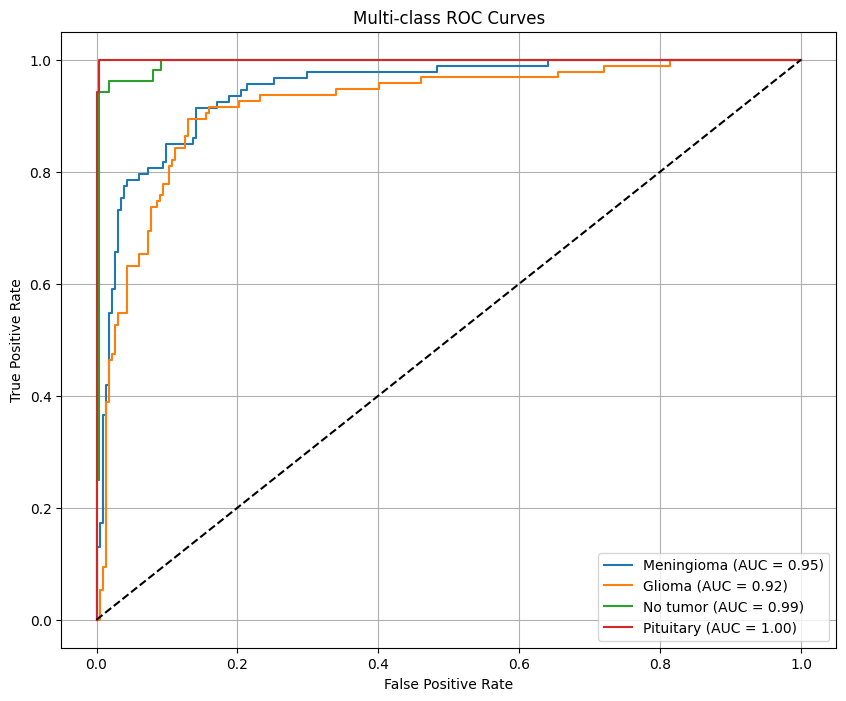

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_bin = y_test
y_pred_prob = model.predict(X_test)
n_classes = y_test.shape[1]

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()


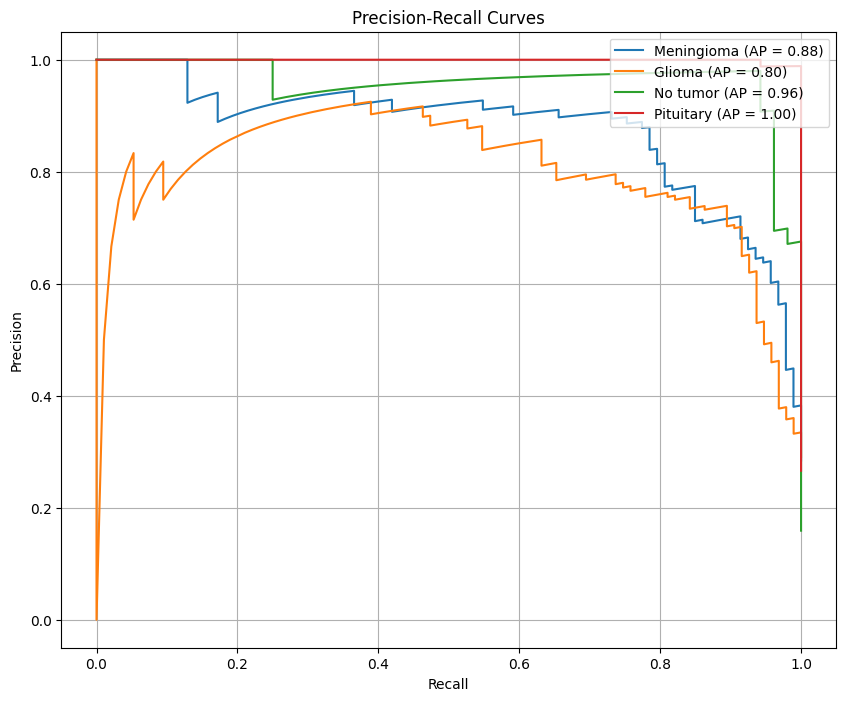

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = {}
recall = {}
avg_precision = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall[i], precision[i], label=f'{class_names[i]} (AP = {avg_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.grid()
plt.show()


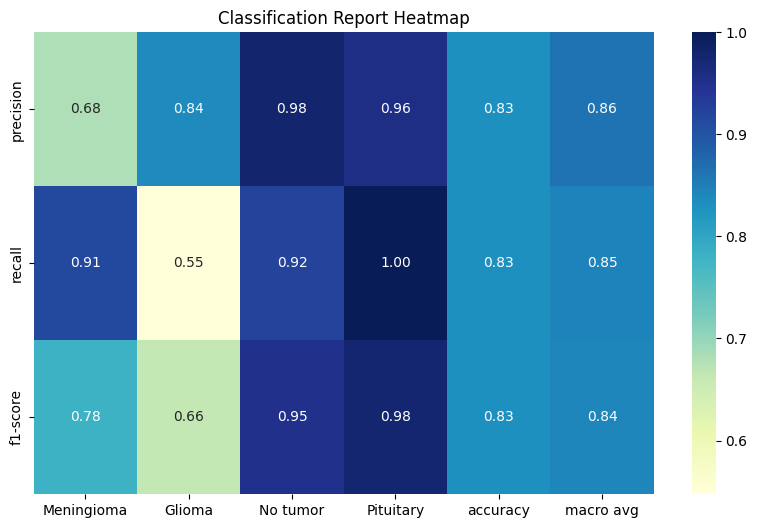

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
df = pd.DataFrame(report_dict).iloc[:-1, :-1]  # exclude support/accuracy row/column

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load model once globally (not inside the function)
model = load_model('braintumor.h5')

# Class names in training order
class_names = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']

def predict_tumor_type(image_path):
    """
    Predicts the brain tumor type from an MRI image.

    Args:
        image_path (str): Path to the MRI image.

    Returns:
        str: Predicted tumor name.
    """

    try:
        # Read and preprocess the image
        img = cv2.imread(image_path)
        img = cv2.resize(img, (150, 150))
        img_array = np.array(img).reshape(1, 150, 150, 3)

        # Predict
        prediction = model.predict(img_array)
        predicted_index = prediction.argmax()
        tumor_name = class_names[predicted_index]

        # Show the image with prediction (optional for Flask, but useful for debugging)
        img_disp = image.load_img(image_path)
        plt.imshow(img_disp)
        plt.axis('off')
        plt.title(f"Prediction: {tumor_name}")
        plt.show()

        return tumor_name

    except Exception as e:
        print(f"Error: {e}")
        return "Prediction Failed"


Saving m (8).jpg to m (8).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


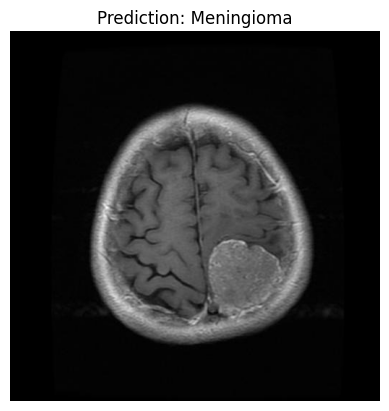

Predicted Tumor Type: Meningioma


In [ ]:
from google.colab import files

# Upload an image manually
uploaded = files.upload()

# Get the path of uploaded image
image_path = list(uploaded.keys())[0]

# Run prediction
result = predict_tumor_type(image_path)
print(f"Predicted Tumor Type: {result}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Define RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, input_shape=(150, 150*3), return_sequences=False)) # Use SimpleRNN layer
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(4, activation='softmax'))

model_rnn.summary()